# Run the whole deltas algorithm

In [98]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [96]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

In [97]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

KeyboardInterrupt: 

## Fit deltas

Original Data


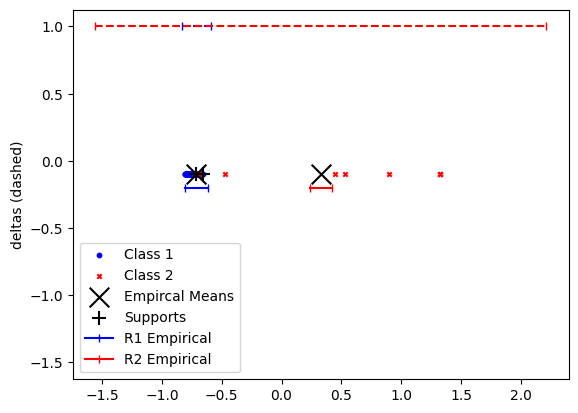

Trying random downsampling deltas: 100%|██████████| 100/100 [00:02<00:00, 38.56it/s]


[([], [], []), ([], [], []), ([], [], []), ([], [], []), ([], [], []), ([], [], []), ([], [], []), ([3299.0734381690613], [{'projected_data': {'X': array([[-0.70284177],
       [-0.72456993],
       [-0.72977431],
       ...,
       [ 0.53074161],
       [ 1.3230143 ],
       [ 1.32289705]]), 'y': array([0, 0, 0, ..., 1, 1, 1]), 'supports': array([[-0.67273422],
       [ 0.53074161]]), 'X1': array([[-0.70284177],
       [-0.72456993],
       [-0.72977431],
       ...,
       [-0.73813125],
       [-0.70721807],
       [-0.70947638]]), 'X2': array([[1.32338433],
       [0.53074161],
       [0.90202349],
       [0.53074161],
       [1.3230143 ],
       [1.32289705]])}, 'empirical margin': array(1.20347583), 'R all data': 1.3233843306167798, 'projected_data 1': array([[-0.70284177],
       [-0.72456993],
       [-0.72977431],
       ...,
       [-0.73813125],
       [-0.70721807],
       [-0.70947638]]), 'projected_data 2': array([[1.32338433],
       [0.53074161],
       [0.90202349],
  

In [ ]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=10000, parallel=True)

## Show parameters

In [ ]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

In [ ]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)

AttributeError: Not fit to any data yet, call 'fit(X, y)' or  method first